In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/캡스톤디자인/^IXIC.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-20,11440.139648,11520.990234,11343.719727,11425.049805,11425.049805,4028100000
1,2022-09-21,11466.209961,11613.570313,11218.990234,11220.190430,11220.190430,4471000000
2,2022-09-22,11167.379883,11203.769531,11024.639648,11066.809570,11066.809570,4916470000
3,2022-09-23,10952.690430,10958.290039,10732.719727,10867.929688,10867.929688,5134350000
4,2022-09-26,10833.379883,11024.000000,10789.049805,10802.919922,10802.919922,4697730000
...,...,...,...,...,...,...,...
246,2023-09-13,13773.669922,13868.570313,13733.820313,13813.589844,13813.589844,4840310000
247,2023-09-14,13889.759766,13957.570313,13810.660156,13926.049805,13926.049805,4649010000
248,2023-09-15,13889.200195,13895.750000,13684.240234,13708.330078,13708.330078,8162210000
249,2023-09-18,13669.959961,13751.280273,13663.459961,13710.240234,13710.240234,4855880000


In [3]:
print(df.isnull())

      Date   Open   High    Low  Close  Adj Close  Volume
0    False  False  False  False  False      False   False
1    False  False  False  False  False      False   False
2    False  False  False  False  False      False   False
3    False  False  False  False  False      False   False
4    False  False  False  False  False      False   False
..     ...    ...    ...    ...    ...        ...     ...
246  False  False  False  False  False      False   False
247  False  False  False  False  False      False   False
248  False  False  False  False  False      False   False
249  False  False  False  False  False      False   False
250  False  False  False  False  False      False   False

[251 rows x 7 columns]


In [4]:
df = df[['Date', 'Adj Close']]
df

,Date,Adj Close
0,2022-09-20,11425.049805
1,2022-09-21,11220.190430
2,2022-09-22,11066.809570
3,2022-09-23,10867.929688
4,2022-09-26,10802.919922
...,...,...
246,2023-09-13,13813.589844
247,2023-09-14,13926.049805
248,2023-09-15,13708.330078
249,2023-09-18,13710.240234


In [5]:
train = df[0:200]
test = df[200:]

In [6]:
train, test

(           Date     Adj Close
 0    2022-09-20  11425.049805
 1    2022-09-21  11220.190430
 2    2022-09-22  11066.809570
 3    2022-09-23  10867.929688
 4    2022-09-26  10802.919922
 ..          ...           ...
 195  2023-06-30  13787.919922
 196  2023-07-03  13816.769531
 197  2023-07-05  13791.650391
 198  2023-07-06  13679.040039
 199  2023-07-07  13660.719727
 
 [200 rows x 2 columns],
            Date     Adj Close
 200  2023-07-10  13685.480469
 201  2023-07-11  13760.700195
 202  2023-07-12  13918.959961
 203  2023-07-13  14138.570313
 204  2023-07-14  14113.700195
 205  2023-07-17  14244.950195
 206  2023-07-18  14353.639648
 207  2023-07-19  14358.019531
 208  2023-07-20  14063.309570
 209  2023-07-21  14032.809570
 210  2023-07-24  14058.870117
 211  2023-07-25  14144.559570
 212  2023-07-26  14127.280273
 213  2023-07-27  14050.110352
 214  2023-07-28  14316.660156
 215  2023-07-31  14346.019531
 216  2023-08-01  14283.910156
 217  2023-08-02  13973.450195
 218  2023-0

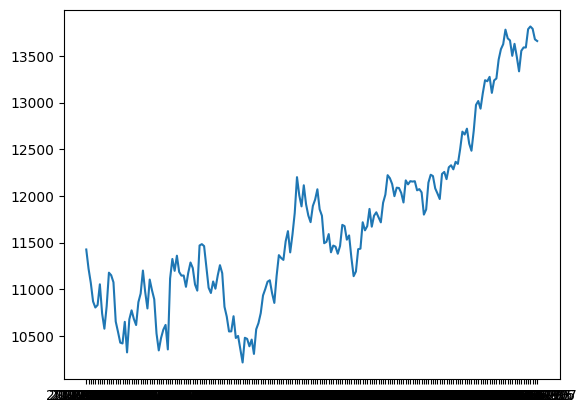

In [7]:
plt.plot(train['Date'], train['Adj Close'])
plt.show()

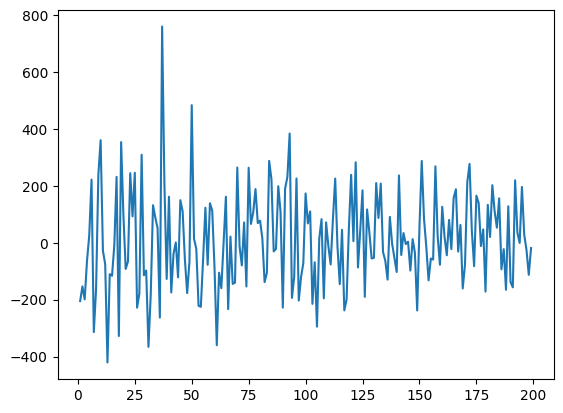

In [8]:
diff_1 = train['Adj Close'].diff().dropna()
plt.plot(diff_1)
plt.show()

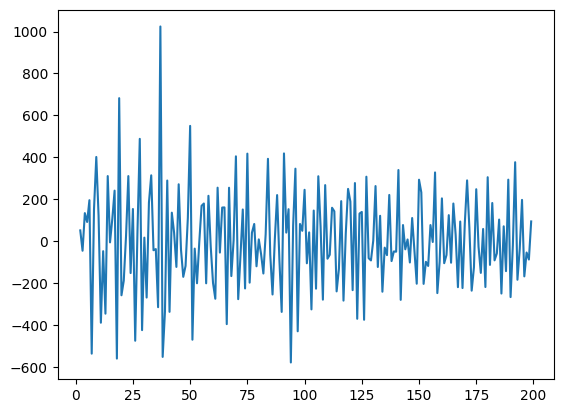

In [9]:
diff_2 = diff_1.diff().dropna()
plt.plot(diff_2)

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

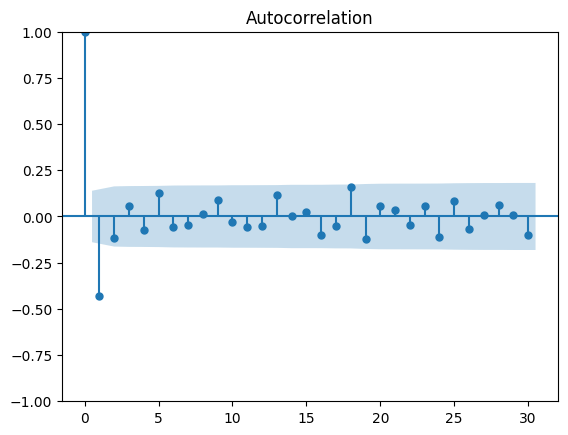

In [11]:
plot_acf(diff_2, lags = 30)
plt.show()

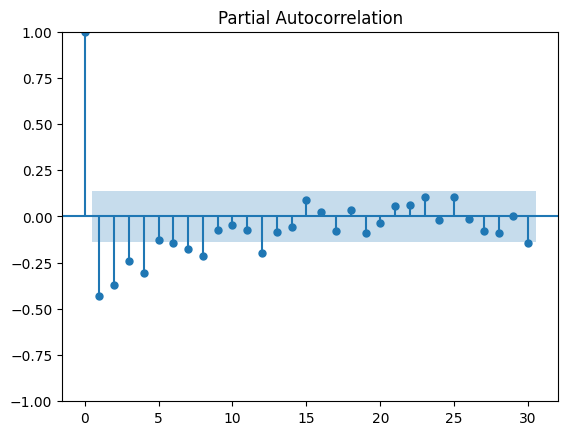

In [12]:
plot_pacf(diff_2, lags = 30)
plt.show()

In [13]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [26]:
model = ARIMA(train['Adj Close'], order = (2, 2, 0))
model_fit = model.fit()

In [27]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  200
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -1331.665
Date:                Thu, 21 Sep 2023   AIC                           2669.331
Time:                        01:57:26   BIC                           2679.195
Sample:                             0   HQIC                          2673.323
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5724      0.069     -8.356      0.000      -0.707      -0.438
ar.L2         -0.3531      0.061     -5.756      0.000      -0.473      -0.233
sigma2      4.063e+04   3513.791     11.563      0.0

In [28]:
forecast = model_fit.get_forecast(steps = 51)
forecast_mean = forecast.predicted_mean

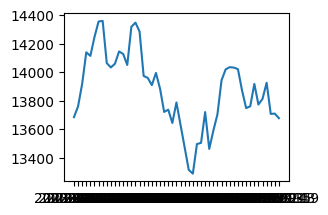

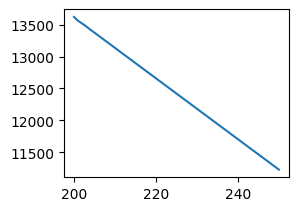

In [29]:
plt.subplot(2,2,1)
plt.plot(test['Date'], test['Adj Close'])
plt.show()

plt.subplot(2,2,2)
plt.plot(forecast_mean)
plt.show()